In [1]:
import torch
import torchvision ## suport para imagens 
import torchaudio


In [2]:
#!pip install --user torch torchvision torchaudio -f https://download.pytorch.org/whl/cu111/torch_stable.html

In [3]:
array = [[1,2,3], [3,2,1]]

tensor = torch.tensor(array)

print(tensor)

tensor([[1, 2, 3],
        [3, 2, 1]])


In [4]:
import numpy as np

np_array = np.array(array)
np_tensor = torch.from_numpy(np_array) 
print(np_array)

[[1 2 3]
 [3 2 1]]


In [5]:
tensor.shape

torch.Size([2, 3])

In [6]:
tensor.dtype

torch.int64

In [7]:
tensor.device

device(type='cpu')

In [8]:
## Aprendizado de maquina profundo requer uma GPU que em recursos de computação paralela, tempos mais rapidos e 
## desempenho

In [9]:
a = torch.tensor([[1,1], [2,2]])
b = torch.tensor([[2,2], [3,3]])

print(a + b)

tensor([[3, 3],
        [5, 5]])


In [10]:
a = torch.tensor([[1,1], [2,2]])
c = torch.tensor([[2,2,4], [3,3,5]])

print(a + c)


RuntimeError: The size of tensor a (2) must match the size of tensor b (3) at non-singleton dimension 1

In [11]:
print(a*b)

tensor([[2, 2],
        [6, 6]])


In [12]:
import torch.nn as nn


input_tensor = torch.tensor([[0.3471, 0.4547, -0.2356]])


In [13]:
linear_layer = nn.Linear(in_features=3, out_features=2)

In [14]:
output = linear_layer(input_tensor)
print(output)

tensor([[0.5755, 0.0364]], grad_fn=<AddmmBackward0>)


In [15]:
linear_layer.weight

Parameter containing:
tensor([[ 0.0246,  0.2566, -0.3642],
        [ 0.4247, -0.0465, -0.3344]], requires_grad=True)

In [16]:
linear_layer.bias

Parameter containing:
tensor([ 0.3645, -0.1687], requires_grad=True)

#### Qual e a operação usada :
$$
    y_0 = W_0 \cdot X + b_0
$$
* X input array
* W weight (peso)
* b bias (vies)


#### Obs 
* Redes apenas com camadas lineares são chamadas de redes totalmente conectadas

In [17]:
model = nn.Sequential(
    nn.Linear(10, 18),
    nn.Linear(18,20),
    nn.Linear(20, 5)
)

In [18]:
input_tensor = torch.tensor([[-0.014, 0.4038, 1.0305, 0.7521, 0.7489, -0.3968, 0.0113, -1.3844, 0.8705, -0.9743]])

In [19]:
out = model(input_tensor)
print(out)

tensor([[-0.0361,  0.2392,  0.0584, -0.3282, -0.0761]],
       grad_fn=<AddmmBackward0>)


#### Função sigmoid
* Função utilizada para problemas de classificação binária

* Suposição: imagine que você quer classificar um animal se é mamifero ou não. Recebemos 3 informações número de membros se põe ovos e se tem pelos.  

* A função simgoide transforma um número inteiro em um valor entre zero e um.
* Se o valor maior que 0.5 então a resposta sera 1 caso contrario sera 0

$$
    \sigma(x) = \frac{1}{1 + e^{-1}}
$$

##### Obs:
Uma rede neural com camadas lineares é equivalente a uma regressão logística usando aprendizado de maquina tradicional
* Para rotulos de varias classes usamos softmax outra função de ativação
$$
    SoftMax(z)_i = \frac{e^{z^i}}{\sum_{j=1}^{K} e^{z_i}}
$$
$z = (z_1, z_2, ..., z_K) z_i \text{ \space um numero real }$



In [20]:

input_tensor = torch.tensor([[6.0]])
sigmoid = nn.Sigmoid()
output = sigmoid(input_tensor)
print(output)

tensor([[0.9975]])


In [21]:
model = nn.Sequential(
    nn.Linear(6,4),
    nn.Linear(4,1),
    nn.Sigmoid()
)

In [22]:
input_tensor = torch.tensor([[4.3, 6.1, 2.3]])

prob = nn.Softmax(dim=-1) ## -1 implica que ele e aplicado a ultima dimensao do input_tensor
output = prob(input_tensor)

print(output)

tensor([[0.1392, 0.8420, 0.0188]])


----

#### Gerações de previsões a partir de modelos. "Executar uma passagem direta"
* Objetivo e propagar os dados de entrada atraves da rede e produzir predições com base nos parâmentros aprendidos peso e vies
* Isso é usado tanto para treinar quanto para gerar novas previsões
* Os resultados pode ser classificações binárias, classificações multiclasse ou previsões numéricas (regressões)
##### Obs :
* retropropagação: é p processo pelo qual os pesos e tendências das camadas são atualizadas durante o treinamento.

#### Loop de treinamento.
1. Propagate
2. Compare
3. BackPropagate
4. Repeat

In [23]:
def generate_list(num):
    import random
    list_rm = list()
    for i in range(num):
        list_rm.append(round(random.uniform(-2, 2), 4))

    return list_rm

In [24]:
generate_list(5)

[-1.6821, -0.4032, 1.7437, 0.8528, 0.6716]

In [25]:
input_data = torch.tensor(
[
        generate_list(6),
        generate_list(6),
        generate_list(6),
        generate_list(6),
        generate_list(6),
]
)
print(input_data)

tensor([[ 0.3030,  0.3275, -0.4911,  0.7394,  0.8377, -0.3272],
        [-1.9366,  1.5638,  1.4196, -1.4898,  1.2209, -1.7915],
        [-0.0815,  1.1365,  1.8121,  0.5956, -0.8902, -1.8634],
        [ 0.8829,  1.2250, -0.7520, -0.0447, -0.8286,  0.8738],
        [-1.1171, -1.2145,  0.7343, -0.6438, -1.3037,  1.1023]])


In [26]:
input_data.shape

torch.Size([5, 6])

In [27]:
model = nn.Sequential(
    nn.Linear(6, 4),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

output = model(input_data)
print(output)

tensor([[0.4834],
        [0.3782],
        [0.4935],
        [0.5582],
        [0.4370]], grad_fn=<SigmoidBackward0>)


In [28]:
n_class = 3 ## numero de classes da multi class

model = nn.Sequential(
    nn.Linear(6,4),
    nn.Linear(4, n_class),
    nn.Softmax(dim=-1)
)

output = model(input_data)
print(output.shape)

torch.Size([5, 3])


In [29]:
print(output)

tensor([[0.2841, 0.4369, 0.2790],
        [0.2400, 0.2642, 0.4958],
        [0.2611, 0.4072, 0.3317],
        [0.3234, 0.3558, 0.3209],
        [0.3436, 0.2451, 0.4112]], grad_fn=<SoftmaxBackward0>)


In [30]:
model = nn.Sequential(
    nn.Linear(6,4),
    nn.Linear(4,1)

)

output = model(input_data)
print(output)

tensor([[-0.4247],
        [-1.1996],
        [-0.9001],
        [-0.9102],
        [-1.3548]], grad_fn=<AddmmBackward0>)


#### Avaliar as predições com os valores reais
* Avaliaremos isso com uma função de perda 
* Ele pega uma as previsões do modelo e um valor verdadeiro e gera um float
##### Exemplo:
Digamos que vamos prever com o modelo se um animal é um mamifero um pássaro ou outros.

$$
    loss = F(y, \hat{y}) 
$$
Usamos a codificação one-hot para transformar o inteiro y em um tensor
* Quando $y = 0$ ha três classes ou  seja $\hat{y} = [1,0,0]$

##### Função de perda  entropia cruzada, é a função mais utilizada para problemas de classificação
Função para variaveis class binarias
$$
    CrossEntropyLoss(y, \hat{y}) = - (y \cdot log(\hat{y}) + (1 - y) \cdot log(1 - \hat{y}))
$$
Função para multi class
$$
    CrossEntropyLoss(y, \hat{y}) = - \sum_{i=1}^{C} y_i \cdot log(\hat{y_i})
$$



In [31]:
import torch.nn.functional as F

print(F.one_hot(torch.tensor(0), num_classes=3))
print(F.one_hot(torch.tensor(1), num_classes=3))
print(F.one_hot(torch.tensor(2), num_classes=3))

tensor([1, 0, 0])
tensor([0, 1, 0])
tensor([0, 0, 1])


In [32]:
from torch.nn import CrossEntropyLoss

score = torch.tensor([[-0.1211, 0.1059]])
one_hot_target = torch.tensor([[1, 0]])

criterion = CrossEntropyLoss()

criterion(score.double(), one_hot_target.double()) ## valor de perda

tensor(0.8131, dtype=torch.float64)

#### Resumo 
* A função de perda toma como entrada o tensor de pontuações que é o modelo
* Ele gera um ponto flutuante da perda da amostra $\newline$
Obs: **O objetivo do treinamento é minimizar a perda.**

In [33]:
y = [2]
scores = torch.tensor([[0.1, 6.0, -2.0, 3.2]])

# Create a one-hot encoded vector of the label y
one_hot_label = F.one_hot(torch.tensor(y), scores.shape[1])

# Create the cross entropy loss function
criterion = nn.CrossEntropyLoss()

# Calculate the cross entropy loss
loss = criterion(scores.double(), one_hot_label.double())
print(loss)

tensor(8.0619, dtype=torch.float64)


---


#### Atualizando os parametros do modelo.

OBS : pensamos na função de perda como uma função "Vale"
* por conta pode existir o minimo local e o minimo global
* e pode existir o maximo global e o maximo local

Deep learning gradient = derivada

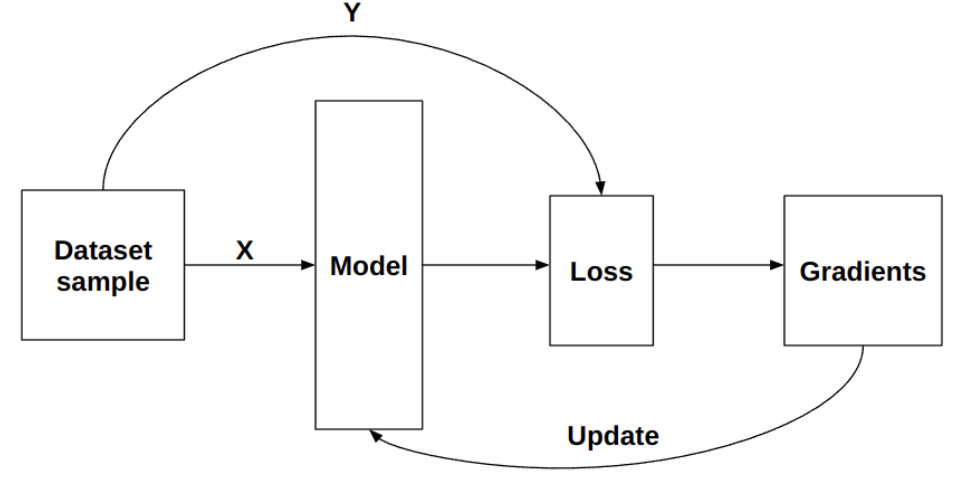

In [34]:
sample = torch.tensor(
[
        generate_list(16),
        generate_list(16),
        generate_list(16),
        generate_list(16),
        generate_list(16),
]
)

In [35]:
target = torch.tensor(
[
    generate_list(2),
    generate_list(2),
    generate_list(2),
    generate_list(2),
    generate_list(2)
]
)

In [36]:
model = nn.Sequential(
    nn.Linear(16, 8),
    nn.Linear(8, 4), 
    nn.Linear(4,2)
)

prediction = model(sample)

criterion = CrossEntropyLoss() ## Essa função de perda e utilizada em classificações

In [37]:
prediction

tensor([[ 0.1316,  0.4664],
        [ 0.2982,  0.1074],
        [ 0.4448,  0.2274],
        [ 0.8192, -0.1931],
        [-0.3420,  0.3670]], grad_fn=<AddmmBackward0>)

In [38]:
loss = criterion(prediction, target)

In [39]:
loss.backward()

In [40]:
print(loss)

tensor(-0.3437, grad_fn=<DivBackward1>)


In [41]:
model[0].weight.grad, model[0].bias.grad

(tensor([[ 0.0471, -0.0113, -0.0580,  0.0658, -0.0146, -0.0068, -0.0657, -0.0986,
          -0.0459,  0.0062, -0.0317,  0.0255, -0.0698, -0.0098,  0.0480,  0.0119],
         [-0.0620,  0.0149,  0.0763, -0.0866,  0.0192,  0.0089,  0.0865,  0.1298,
           0.0604, -0.0081,  0.0417, -0.0335,  0.0919,  0.0129, -0.0632, -0.0157],
         [ 0.0159, -0.0038, -0.0195,  0.0221, -0.0049, -0.0023, -0.0221, -0.0332,
          -0.0154,  0.0021, -0.0107,  0.0086, -0.0235, -0.0033,  0.0162,  0.0040],
         [ 0.1594, -0.0382, -0.1961,  0.2225, -0.0493, -0.0230, -0.2223, -0.3334,
          -0.1551,  0.0209, -0.1072,  0.0861, -0.2361, -0.0330,  0.1624,  0.0404],
         [-0.0422,  0.0101,  0.0520, -0.0589,  0.0131,  0.0061,  0.0589,  0.0883,
           0.0411, -0.0055,  0.0284, -0.0228,  0.0625,  0.0088, -0.0430, -0.0107],
         [-0.1111,  0.0266,  0.1368, -0.1552,  0.0344,  0.0160,  0.1550,  0.2325,
           0.1082, -0.0146,  0.0748, -0.0601,  0.1647,  0.0230, -0.1133, -0.0282],
         [

In [42]:
model[1].weight.grad, model[1].bias.grad

(tensor([[ 4.4497e-02, -1.9862e-04,  8.5360e-06, -2.6416e-02,  2.4687e-02,
          -1.4890e-02, -3.2992e-02, -5.3365e-02],
         [ 1.3266e-01, -5.9208e-04,  2.5527e-05, -7.8755e-02,  7.3599e-02,
          -4.4391e-02, -9.8359e-02, -1.5910e-01],
         [-9.8769e-02,  4.4085e-04, -1.8996e-05,  5.8636e-02, -5.4797e-02,
           3.3051e-02,  7.3232e-02,  1.1845e-01],
         [ 1.2364e-01, -5.5184e-04,  2.3780e-05, -7.3401e-02,  6.8595e-02,
          -4.1374e-02, -9.1672e-02, -1.4828e-01]]),
 tensor([-0.0927, -0.2764,  0.2058, -0.2576]))

In [43]:
model[2].weight.grad, model[2].bias.grad

(tensor([[-0.0133,  0.0494,  0.0311,  0.0063],
         [ 0.0133, -0.0494, -0.0311, -0.0063]]),
 tensor([-0.4257,  0.4257]))

In [44]:
## Atualizando as camadas do modelo

In [45]:
# learning rate is typically small taxa de aprendizado
lr = 0.001

## upadete the weights atualizanfo os pesos
weight = model[0].weight
weight_grad =model[0].weight.grad
weight = weight - lr* weight_grad

In [46]:
# update the biases atualizanfo os vies
bias = model[0].bias
bias_grad = model[0].bias.grad
bias = bias - lr * bias_grad

### OBS matemáticas ....
* Minimizar a função perda o objetivo e encontrar o minimo global.
* Quando temos apenas um minimo global sabemos que nossa função e convexa.
* Qaundo temos varios minimos locais sabemos que nossa função não e convexa.

In [47]:
# Gradiente descendente

import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=0.001)     ## gradiente estocastico mais conhecido

In [48]:
optimizer.step()

#### Writing our first training loop
1. Criar o modelo
2. Escolher a função perda
3. Criar um dataset
4. Definir um otimizador
5. Percorrer cada elemento do conjunto de dados calcular. (ciclo de treinamento)
    * Perda
    * Clacular os gradientes locais
    * Atualizar os parametros do modelo

OBS: Criamos nosso proprio metodo fit em uma deep learning


------

In [49]:
import pandas as pd


In [50]:
df = pd.read_csv("./data/ds_salaries.csv")

In [51]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [52]:
df = df[["experience_level", "employment_type", "remote_ratio", "company_size", "salary_in_usd"]]

In [53]:
df.head()

,experience_level,employment_type,remote_ratio,company_size,salary_in_usd
0,SE,FT,100,L,85847
1,MI,CT,100,S,30000
2,MI,CT,100,S,25500
3,SE,FT,100,M,175000
4,SE,FT,100,M,120000


In [54]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [55]:
label_encoder = LabelEncoder()
standar_scaler = StandardScaler()
scaler = MinMaxScaler()

## Transformando as variaveis em categoricas Ok
df.experience_level = label_encoder.fit_transform(df["employment_type"])
df.employment_type = label_encoder.fit_transform(df["employment_type"])
df.company_size = label_encoder.fit_transform(df.company_size)


In [56]:
df[["salary_in_usd", "remote_ratio"]] = scaler.fit_transform(
    df[["salary_in_usd", "remote_ratio"]]
)

In [57]:
df

,experience_level,employment_type,remote_ratio,company_size,salary_in_usd
0,2,2,1.0,0,0.181436
1,0,0,1.0,2,0.055900
2,0,0,1.0,2,0.045784
3,2,2,1.0,1,0.381839
4,2,2,1.0,1,0.258207
...,...,...,...,...,...
3750,2,2,1.0,0,0.914581
3751,2,2,1.0,0,0.327891
3752,2,2,1.0,2,0.224489
3753,0,0,1.0,0,0.213250


In [58]:
def mean_square_loss(prediction, target): ## MSE
    from numpy import mean as m
    return m((prediction - target)**2)



In [59]:
## ou entao podemos usar
criterion = nn.MSELoss()
loss = criterion(prediction, target)

In [60]:
features = df[["experience_level", "employment_type", "remote_ratio", "company_size"]].values
target = df[["salary_in_usd"]].values

In [61]:
## Creando o dataset e o dataloader
from torch.utils.data import TensorDataset, DataLoader

dataset = TensorDataset(
    torch.tensor(features).float(), torch.tensor(target).float()
)

In [62]:
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)


In [63]:
## Criando o modelo

model = nn.Sequential(
    nn.Linear(4, 2),
    nn.Linear(2, 1)
)

In [64]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [65]:
num_epochs = 5

In [66]:
for epoch in range(num_epochs):
    for data in dataloader:
        ## setar os gradientes
        optimizer.zero_grad()
        ## pegando os pacotes separados nos lotes
        features, target = data
        ## calculando as preds
        pred = model(features)
        ## Computando as perdas e os gradientes
        loss = criterion(pred, target)
        loss.backward()
        ## Atualizando a etapa
        optimizer.step()
        print(f"Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item()}")

Epoch: 1/5, Loss: 0.06031482666730881
Epoch: 1/5, Loss: 0.031628478318452835
Epoch: 1/5, Loss: 0.027172639966011047
Epoch: 1/5, Loss: 0.06647778302431107
Epoch: 1/5, Loss: 0.0314297191798687
Epoch: 1/5, Loss: 0.032982341945171356
Epoch: 1/5, Loss: 0.047544773668050766
Epoch: 1/5, Loss: 0.1476508378982544
Epoch: 1/5, Loss: 0.11596079915761948
Epoch: 1/5, Loss: 0.0540112629532814
Epoch: 1/5, Loss: 0.045871131122112274
Epoch: 1/5, Loss: 0.09112731367349625
Epoch: 1/5, Loss: 0.04865649715065956
Epoch: 1/5, Loss: 0.03691526874899864
Epoch: 1/5, Loss: 0.050243742763996124
Epoch: 1/5, Loss: 0.03383703902363777
Epoch: 1/5, Loss: 0.0678509771823883
Epoch: 1/5, Loss: 0.04061385616660118
Epoch: 1/5, Loss: 0.0872306078672409
Epoch: 1/5, Loss: 0.01640937477350235
Epoch: 1/5, Loss: 0.027068395167589188
Epoch: 1/5, Loss: 0.07344000786542892
Epoch: 1/5, Loss: 0.028919978067278862
Epoch: 1/5, Loss: 0.03578856214880943
Epoch: 1/5, Loss: 0.08142293244600296
Epoch: 1/5, Loss: 0.0365072526037693
Epoch: 1/5

Epoch: 1/5, Loss: 0.024382691830396652
Epoch: 1/5, Loss: 0.04024592414498329
Epoch: 1/5, Loss: 0.005442417226731777
Epoch: 1/5, Loss: 0.009135809727013111
Epoch: 1/5, Loss: 0.017157860100269318
Epoch: 1/5, Loss: 0.00855586864054203
Epoch: 1/5, Loss: 0.015481509268283844
Epoch: 1/5, Loss: 0.012787370942533016
Epoch: 1/5, Loss: 0.03398417308926582
Epoch: 1/5, Loss: 0.038596261292696
Epoch: 1/5, Loss: 0.07609329372644424
Epoch: 1/5, Loss: 0.021417545154690742
Epoch: 1/5, Loss: 0.020517893135547638
Epoch: 1/5, Loss: 0.0096110999584198
Epoch: 1/5, Loss: 0.01596149615943432
Epoch: 1/5, Loss: 0.00836610235273838
Epoch: 1/5, Loss: 0.04537900164723396
Epoch: 1/5, Loss: 0.036458492279052734
Epoch: 1/5, Loss: 0.026121828705072403
Epoch: 1/5, Loss: 0.02355378307402134
Epoch: 1/5, Loss: 0.023211494088172913
Epoch: 1/5, Loss: 0.010793793015182018
Epoch: 1/5, Loss: 0.0010509913554415107
Epoch: 1/5, Loss: 0.029705047607421875
Epoch: 1/5, Loss: 0.01966405101120472
Epoch: 1/5, Loss: 0.019466523081064224

In [67]:
## show_results(model, dataloader) ## depois que terminar o curso criar essa função para descrever o modelo pra mim 

---

### Sigmoid function Limitações
* É limitada entre 0 e 1
* Segue uma destribuição normal (graficamente)

### SoftMax function
* Quando calculamos o gradiente das duas funções elas se aproxima de zero
* Também satura.


Obs: Saturação acontece quando calculamos o gradiente de uma função e idependente dos sua primeira ou enezima gradiente ela converge para zero.
E isso impede que nosso modelo rode $n$ vezes, assim impedindo que o peso seja alterado ou atualizado. (gradiente de fulga)


### Function ReLU
$$ReLU(x)= max(0, x)$$

* Não possui limite superior 
* Os gradientes não convergem para zero o que supera o gradiente de fuga

### Function Leaky ReLU
* Onde a diferença e apenas que para valores negativos ela tem um fato de multiplicação de x

In [68]:
# Create a ReLU function with PyTorch
relu_pytorch = nn.ReLU()

# Apply your ReLU function on x, and calculate gradients
x = torch.tensor(-1.0, requires_grad=True)
y = relu_pytorch(x)
y.backward()

# Print the gradient of the ReLU function for x
gradient = x.grad
print(gradient)

tensor(0.)


In [69]:
# Create a leaky relu function in PyTorch
leaky_relu_pytorch = nn.LeakyReLU(negative_slope=0.05)

x = torch.tensor(-2.0)
# Call the above function on the tensor x
output = leaky_relu_pytorch(x)
print(output)

tensor(-0.1000)


### Arquitetura de modelos
Lembre-se que quando cada neuronio da camada está conectada a cada neuronio da camada anterior chamamos de camadas completamente conectadas. 
Cada neuronio de uma camada linear calculará um operação linear usando todos os neuronios da camada anterior.

Ou seja cada neuronio tem $n+1$ que  e o parametro que pode ser aprendido mais um para o vies.

**Redes Neurais Totalmente Conectadas**

In [70]:
n_features = 8
n_classes = 2

model = nn.Sequential(
    nn.Linear(n_features, 4),
    nn.Linear(4, 2),
)

## Temos duas camadas ocultas nesse modelo



In [71]:
total = 0 
for parameter in model.parameters():
    total += parameter.numel()
print(total)

46


In [72]:
def calculate_capacity(model):
    total = 0
    for p in model.parameters():
        total += p.numel()
    return total

### Otimizador impactando no treinamento
O que controla a inercia do otimizador e o momentum
* Encontrar bons valores para a taxa de aprendizado e o impulso e fundamental para diminuir o tempo de treinamento do modelo ou mau desempenho.
* Um dos maiores desafios e tentar encontrar o minimo de uma função não convexa e ficar preso em um minimo local.

**Resumo**
* Momento: Controla a inercia do otimizador, sem impulso o otimizador pode ficar preso em um otimo local. Ele varia de $0.85$ a $0.99$
* Taxa de aprendizado: lr Tamanho da taxa do peso executado pelo otimizador variam $10^{-2}$ a $10^{-4}$ se a essa taxa for muito alta o otimizador podera nunca conseguir minimizar a função perda. E se tiver muito baixo o trinamento pode demorar mais.


In [80]:
layer = nn.Linear(64, 128)

print(layer.weight.max())
print(layer.weight.min())

tensor(0.1250, grad_fn=<MaxBackward1>)
tensor(-0.1250, grad_fn=<MinBackward1>)


### Obs
Engenheiros de machine learning nunca se baseam por pesos ja inicializados, geralmente utilizam um conceito chamado aprendizado por transferência.
* O conceito se consiste em pegar um modelo treinado em uma tarefa e reutiliza-lo para a segunda tarefa

In [88]:
layer = nn.Linear(64, 128)
torch.save(layer, "layer.pth")

In [89]:
new_layer = torch.load("layer.pth")

* Podemos treinar uma parte so da rede neural
* As camadas iniciais não precisão ser treinadas
* Então podemos optar por congelar elas 

In [92]:
model = nn.Sequential(
    nn.Linear(64, 128),
    nn.Linear(128,256)
)

for name, param in model.named_parameters():
    if name == "0.weight":
        param.requires_grad = False ## definimos aqui como falso caso quera não carregar o gradiente 0



In [94]:
## ou podemos usar como
for name, param in model.named_parameters():
    # Check if the parameters belong to the first layer
    if name == "0.weight" or name == "0.bias":
        # Freeze the parameters
        param.requires_grad = False

    # Check if the parameters belong to the second layer
    if name == "1.weight" or name == "1.bias":
        # Freeze the parameters
        param.requires_grad = False

In [98]:
nn.init.uniform_(layer.weight)

Parameter containing:
tensor([[0.9862, 0.7974, 0.2262,  ..., 0.4242, 0.3383, 0.7653],
        [0.7035, 0.8719, 0.7898,  ..., 0.5655, 0.4785, 0.8840],
        [0.3541, 0.3229, 0.3210,  ..., 0.4788, 0.0443, 0.1420],
        ...,
        [0.6155, 0.3711, 0.6028,  ..., 0.7323, 0.3947, 0.8518],
        [0.7579, 0.9891, 0.1630,  ..., 0.0581, 0.6442, 0.8467],
        [0.7310, 0.6758, 0.5004,  ..., 0.7823, 0.2196, 0.3256]],
       requires_grad=True)

----

In [99]:
df = pd.read_csv("./data/zoo.csv")

In [100]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [102]:
df = df[["animal_name", "hair", "feathers", "eggs", "milk", "predator", "fins", "legs", "tail", "class_type"]]

In [105]:
import numpy as np

features = df[df.columns[1:-1]]
X = np.array(features).astype(float)
print(X)

[[1. 0. 0. 1. 1. 0. 4. 0.]
 [1. 0. 0. 1. 0. 0. 4. 1.]
 [0. 0. 1. 0. 1. 1. 0. 1.]
 [1. 0. 0. 1. 1. 0. 4. 0.]
 [1. 0. 0. 1. 1. 0. 4. 1.]
 [1. 0. 0. 1. 0. 0. 4. 1.]
 [1. 0. 0. 1. 0. 0. 4. 1.]
 [0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 1. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 4. 0.]
 [1. 0. 0. 1. 1. 0. 4. 1.]
 [0. 1. 1. 0. 0. 0. 2. 1.]
 [0. 0. 1. 0. 1. 1. 0. 1.]
 [0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 4. 0.]
 [0. 0. 1. 0. 1. 0. 6. 0.]
 [0. 1. 1. 0. 1. 0. 2. 1.]
 [1. 0. 0. 1. 0. 0. 4. 1.]
 [0. 0. 1. 0. 1. 1. 0. 1.]
 [0. 0. 0. 1. 1. 1. 0. 1.]
 [0. 1. 1. 0. 0. 0. 2. 1.]
 [0. 1. 1. 0. 0. 0. 2. 1.]
 [1. 0. 0. 1. 0. 0. 4. 1.]
 [0. 1. 1. 0. 0. 0. 2. 1.]
 [0. 0. 1. 0. 0. 0. 6. 0.]
 [0. 0. 1. 0. 1. 0. 4. 0.]
 [0. 0. 1. 0. 1. 0. 4. 0.]
 [1. 0. 0. 1. 0. 0. 2. 1.]
 [1. 0. 0. 1. 0. 0. 4. 1.]
 [1. 0. 0. 1. 1. 0. 2. 0.]
 [0. 0. 1. 0. 0. 0. 6. 0.]
 [1. 0. 0. 1. 0. 0. 4. 1.]
 [1. 0. 0. 1. 0. 0. 2. 0.]
 [0. 1. 1. 0. 1. 0. 2. 1.]
 [0. 0. 1. 0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 4. 1.]
 [1. 0. 0. 1. 0. 0. 4. 1.]
 

In [108]:
target = df[df.columns[-1]]
y = np.array(target).astype(float)
print(y)

[1. 1. 4. 1. 1. 1. 1. 4. 4. 1. 1. 2. 4. 7. 7. 7. 2. 1. 4. 1. 2. 2. 1. 2.
 6. 5. 5. 1. 1. 1. 6. 1. 1. 2. 4. 1. 1. 2. 4. 6. 6. 2. 6. 2. 1. 1. 7. 1.
 1. 1. 1. 6. 5. 7. 1. 1. 2. 2. 2. 2. 4. 4. 3. 1. 1. 1. 1. 1. 1. 1. 1. 2.
 7. 4. 1. 1. 3. 7. 2. 2. 3. 7. 4. 2. 1. 7. 4. 2. 6. 5. 3. 3. 4. 1. 1. 2.
 1. 6. 1. 7. 2.]


In [109]:
dataset = TensorDataset(torch.tensor(X).float(), torch.tensor(y))

In [110]:
sample = dataset[0]
input_sample, label_sample = sample
print("input sample", input_sample)
print("label_sample", label_sample)

input sample tensor([1., 0., 0., 1., 1., 0., 4., 0.])
label_sample tensor(1., dtype=torch.float64)


In [111]:
batch_size = 2 ## tamanho do lote ## determina o quantas amostras retiramos do conjunto de dados por interação
shuffle = True ## embaralha os dados em cada interação

dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)


In [117]:
for batch_inputs, batch_labels in dataloader:
    print("batch input", batch_inputs)
    print("batch labels", batch_labels)
    print("--------------------")

batch input tensor([[0., 0., 1., 0., 0., 0., 0., 0.],
        [1., 0., 0., 1., 0., 0., 4., 1.]])
batch labels tensor([7., 1.], dtype=torch.float64)
--------------------
batch input tensor([[0., 1., 1., 0., 0., 0., 2., 1.],
        [0., 0., 1., 0., 0., 0., 4., 0.]])
batch labels tensor([2., 5.], dtype=torch.float64)
--------------------
batch input tensor([[1., 0., 0., 1., 0., 0., 4., 1.],
        [1., 0., 1., 0., 0., 0., 6., 0.]])
batch labels tensor([1., 6.], dtype=torch.float64)
--------------------
batch input tensor([[1., 0., 1., 0., 0., 0., 6., 0.],
        [1., 0., 1., 1., 1., 0., 4., 1.]])
batch labels tensor([6., 1.], dtype=torch.float64)
--------------------
batch input tensor([[0., 0., 1., 0., 0., 0., 6., 0.],
        [0., 1., 1., 0., 1., 0., 2., 1.]])
batch labels tensor([6., 2.], dtype=torch.float64)
--------------------
batch input tensor([[0., 0., 1., 0., 1., 0., 6., 0.],
        [1., 0., 0., 1., 1., 0., 4., 1.]])
batch labels tensor([6., 1.], dtype=torch.float64)
-------

In [119]:
x, y = next(iter(dataloader)) ## nao sabia
print(x)
print(y)


tensor([[0., 1., 1., 0., 0., 0., 2., 1.],
        [0., 0., 1., 0., 1., 0., 0., 1.]])
tensor([2., 3.], dtype=torch.float64)


### Métricas de avaliação dos modelos
* Como no aprendizado de máquina, o conjunto de dados de teste é usado apenas uma vez para calcular as métricas finais
* Tranig - 80 - 90 % -> Usado para ajustar os parametros do modelo
* Validation 10 - 20 % -> tunar os hyperparametros
* Testing 5 - 10 % -> usado para calcular as metricas finais

### Calculando a perda no treinamento
* Calculada somando a perda em cada interação do dataloader
* Ao final de cada epoca calculamos o valor médio de perda de treinamento

In [121]:
trainig_loss = 0.0

In [ ]:
for i, data in enumerate(trainsloader):
    ##....
    
    
    loss = criterion(output, labels)
    trainig_loss += loss.item()

epoch_loss = trainig_loss / len(trainsloader)


In [ ]:
validation_loss = 0.0
model.eval() ## metodo de avaliacao da classe
## por que  algumas camadas nos modelos de pytorch se comportam de maneira diferentes nos estagios de treinamento e validacao
with torch.no_grad(): ## Indicando que nao vamos fazer calculos de gradientes nessa epoca
    for i, data in enumerate(validationloader, 0):
        ## Run the forward pass  
        ##...
        #..
        #.
        loss = criterion(outputs, labels)
        validation_loss += loss.item()

epoch_loss = validation_loss / len(validationloader) 
model.train() ## indica que colocamos o modelo de volta no modo de treino 

#### OBS
* Assim podemos avaliar se o modelo esta tendo overfitting

**Overfitting**: ocorre quando o modelo para de generalizar o desempenho no conjunto de dados e a validação diminui (ou seja ambas tem que estar andando juntas)

In [125]:
import torchmetrics